In [12]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stories = ["alice", "gatsby", "mendips", "pride"]

In [31]:
chapters_df = pd.DataFrame()
scenes_df = pd.DataFrame()

In [32]:
for story in stories:
    with open(f"json/{story}/final_data.json") as f:
        data = json.load(f)
    
    # chapter data
    chapters = data["chapters"]
    for chapter in chapters:
        num_scenes = chapter["scenes"]
        num_lines = chapter["num_lines"]
        characters = chapter["characters"]
        num_chars = len(characters)
        locations = chapter["locations"]
        num_locs = len(locations)
        chapter_data = {
            "chapter": chapter["chapter"],
            "num_scenes": num_scenes,
            "num_lines": num_lines,
            "num_chars": num_chars,
            "num_locs": num_locs,
            "story": story,
        } 
        chapters_df = pd.concat([chapters_df, pd.DataFrame([chapter_data])], ignore_index=True)

    # scene data
    scenes = data["scenes"]
    for scene in scenes:
        num_lines = scene["num_lines"]
        characters = scene["characters"]
        num_chars = len(characters)
        scene_data = {
            "scene": scene["title"],
            "num_lines": num_lines,
            "num_chars": num_chars,
            "story": story,
        }
        scenes_df = pd.concat([scenes_df, pd.DataFrame([scene_data])], ignore_index=True)

In [8]:
chapters_df

,chapter,num_scenes,num_lines,num_chars,num_locs,story
0,CHAPTER I.,5,181,2,4,alice
1,CHAPTER II.,1,172,3,1,alice
2,CHAPTER III.,1,156,7,1,alice
3,CHAPTER IV.,1,216,4,1,alice
4,CHAPTER V.,1,213,2,1,alice
...,...,...,...,...,...,...
56,CHAPTER XIX.,1,164,3,1,pride
57,CHAPTER XX.,1,143,5,1,pride
58,CHAPTER XXI.,4,174,7,2,pride
59,CHAPTER XXII.,7,150,6,5,pride


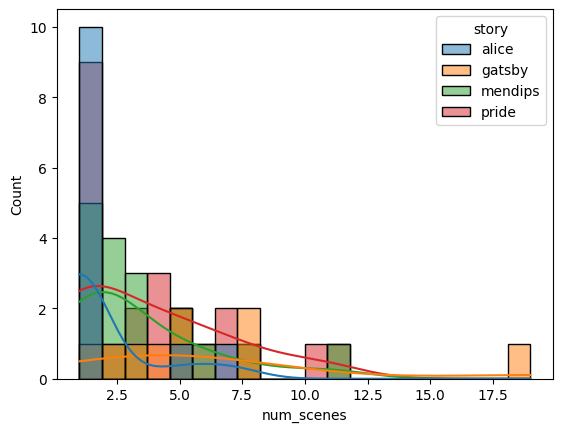

In [20]:
# plot distribution of number of scenes per chapter, color by story
sns.histplot(chapters_df, x="num_scenes", hue="story", bins=20, kde=True)
plt.show()

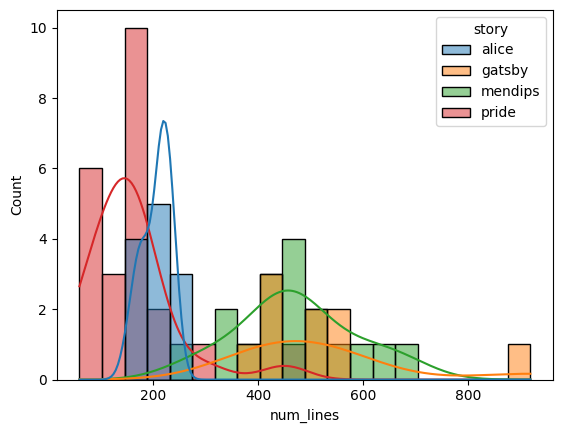

In [14]:
# now plot distribution of number of lines per chapter, color by story
sns.histplot(chapters_df, x="num_lines", hue="story", bins=20, kde=True)
plt.show()

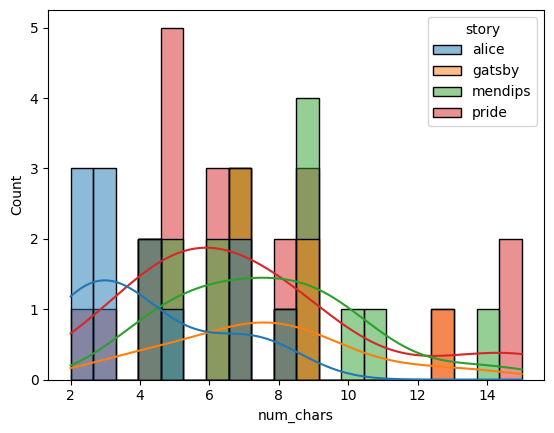

In [15]:
# now plot distribution of number of characters per chapter, color by story
sns.histplot(chapters_df, x="num_chars", hue="story", bins=20, kde=True)
plt.show()

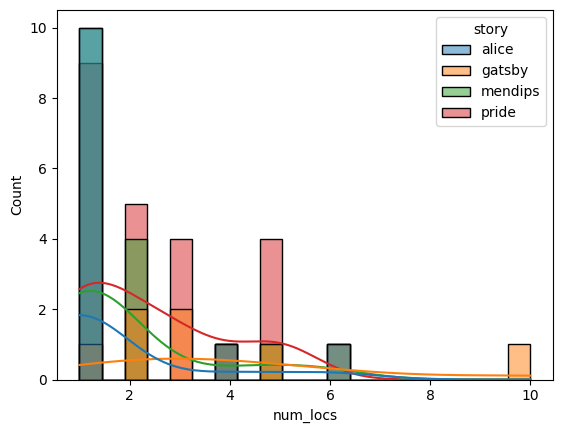

In [16]:
# now plot distribution of number of locations per chapter, color by story
sns.histplot(chapters_df, x="num_locs", hue="story", bins=20, kde=True)
plt.show()

In [26]:
# Select only numeric columns for mean calculation
numeric_columns = chapters_df.select_dtypes(include="number")
story_means = chapters_df.groupby("story")[numeric_columns.columns].mean()
story_means

,num_scenes,num_lines,num_chars,num_locs
story,,,,
alice,1.833333,205.250000,4.166667,1.666667
gatsby,6.111111,523.333333,7.555556,4.000000
mendips,3.352941,471.823529,7.647059,1.941176
pride,3.826087,158.739130,7.086957,2.391304


In [33]:
scenes_df

,scene,num_lines,num_chars,story
0,Alice's Boredom and the White Rabbit,21,2,alice
1,Falling Down the Rabbit Hole,57,1,alice
2,The Hall of Doors,22,2,alice
3,The Drink Me Bottle,32,1,alice
4,The Cake,46,1,alice
...,...,...,...,...
217,Mrs. Bennet's Displeasure,9,4,pride
218,Anxiety Over Bingley,14,3,pride
219,Mrs. Bennet's Impatience,9,3,pride
220,Mr. Collins's Return,7,3,pride


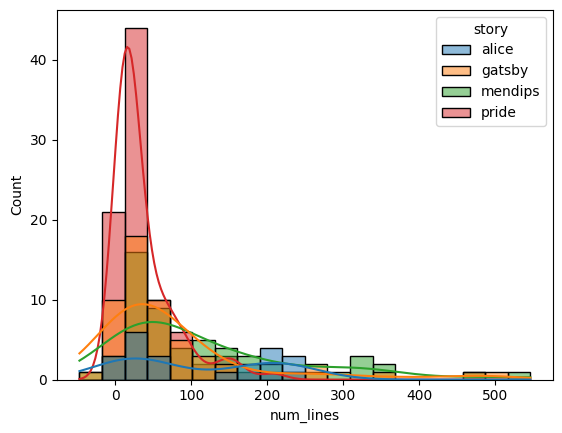

In [17]:
# plot distribution of number of lines per scene, color by story
sns.histplot(scenes_df, x="num_lines", hue="story", bins=20, kde=True)
plt.show()

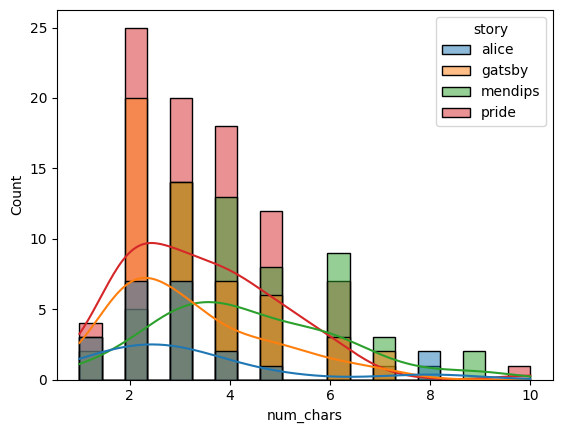

In [18]:
# now plot distribution of number of characters per scene, color by story
sns.histplot(scenes_df, x="num_chars", hue="story", bins=20, kde=True)
plt.show()

In [35]:
# Select only numeric columns for mean calculation
numeric_columns_scenes = scenes_df.select_dtypes(include="number")
story_means_scenes = scenes_df.groupby("story")[numeric_columns_scenes.columns].mean()
story_means_scenes

,num_lines,num_chars
story,,
alice,107.863636,3.045455
gatsby,77.090909,3.181818
mendips,119.175439,4.333333
pride,36.477273,3.465909
